In [5]:
# Libraries
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

from keras import models
from keras import layers

In [3]:
# Make 1000 samples 
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [4]:
print(type(X), X.shape)
print(type(y), y.shape)
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

<class 'numpy.ndarray'> (1000, 2)
<class 'numpy.ndarray'> (1000,)
First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [6]:
# Make DataFrame of circle data
circles = pd.DataFrame({
    "X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [7]:
print(circles.label.value_counts())

label
1    500
0    500
Name: count, dtype: int64


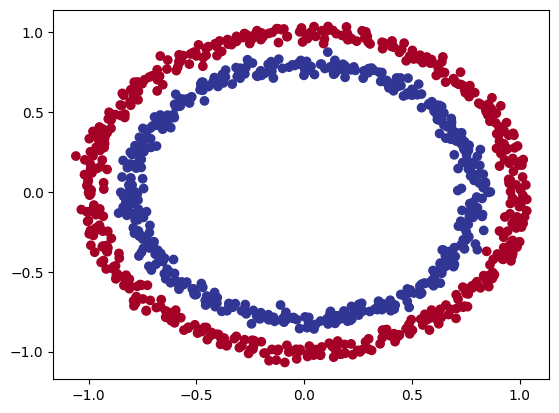

In [8]:
# plot the data
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [9]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

In [10]:
print(type(X_train), X_train.shape)
print(type(y_train), y_train.shape)
print(X_train[:5])
print(y_train[:5])

<class 'numpy.ndarray'> (800, 2)
<class 'numpy.ndarray'> (800,)
[[ 0.65794626 -0.46508097]
 [ 0.63194897 -0.7346633 ]
 [-1.00861631 -0.12403051]
 [-0.96657519 -0.22562157]
 [-0.16659009  0.79944645]]
[1 0 0 0 1]


In [45]:
# Building a model
# Build a binary classification model for circles
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(2,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 16)                48        
                                                                 
 dense_12 (Dense)            (None, 16)                272       
                                                                 
 dense_13 (Dense)            (None, 1)                 17        
                                                                 
Total params: 337 (1.32 KB)
Trainable params: 337 (1.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
# See the output of the model
# If y_pred_probs >= 0.5, y=1 (class 1)
# If y_pred_probs < 0.5, y=0 (class 0)
y_pred = model.predict(X_test[:5])
print(y_pred)
print(y_test[:5])

1/1 [==============================] - 0s 29ms/step
[[0.50726783]
 [0.49769172]
 [0.5092635 ]
 [0.5139157 ]
 [0.48499066]]
[1 0 1 0 1]


In [46]:
from keras.optimizers import SGD

optimizer = SGD(learning_rate=0.1)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [47]:
no_epochs = 50
history = model.fit(X_train,
                    y_train,
                    epochs=no_epochs,
                    batch_size=512,
                    validation_data=(X_test, y_test))

Epoch 1/50
2/2 [==============================] - 0s 53ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6939 - val_accuracy: 0.4900
Epoch 2/50
2/2 [==============================] - 0s 11ms/step - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.6936 - val_accuracy: 0.4950
Epoch 3/50
2/2 [==============================] - 0s 11ms/step - loss: 0.6928 - accuracy: 0.5013 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/50
2/2 [==============================] - 0s 11ms/step - loss: 0.6924 - accuracy: 0.5025 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/50
2/2 [==============================] - 0s 10ms/step - loss: 0.6922 - accuracy: 0.5038 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 6/50
2/2 [==============================] - 0s 11ms/step - loss: 0.6919 - accuracy: 0.5063 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 7/50
2/2 [==============================] - 0s 11ms/step - loss: 0.6916 - accuracy: 0.5050 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 8/50
2/2 [===========

In [49]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

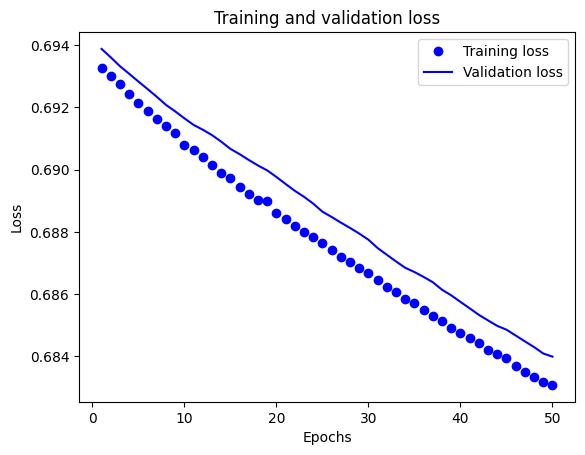

In [50]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, no_epochs + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

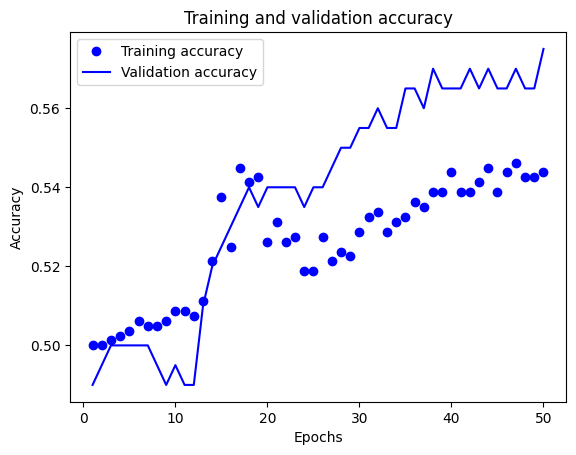

In [51]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, no_epochs + 1)

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [52]:
# evaluate
results = model.evaluate(X_test, y_test)
print(results)
# accuracy of 57%

7/7 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.5750
[0.6839885711669922, 0.574999988079071]


In [55]:
# predict
# generate the likelihood of belonging to a class_0 or class_1
result = model.predict(X_test[:5])
print(result)
print(np.round(result))
print(y_test[:5])

1/1 [==============================] - 0s 13ms/step
[[0.501974  ]
 [0.52390796]
 [0.5113588 ]
 [0.4999579 ]
 [0.47421256]]
[[1.]
 [1.]
 [1.]
 [0.]
 [0.]]
[1 0 1 0 1]


In [ ]:
# predict
def predict_classes(predictions, threshold=0.5):
    return (predictions >= threshold).astype(int)
    
# generate the likelihood of belonging to a class_0 or class_1
result = model.predict(X_test[:5])
print(result)
predicted_classes = predict_classes(results)
print(predicted_classes)